# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from ast import literal_eval
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn.datasets import make_moons
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

## Load data and Pre-processing 

In [3]:
train_data = pd.read_csv('Website_Fingerprinting_CDMC2023.csv')
train_data.head()

,packet_size_with_direction_0,packet_size_with_direction_1,packet_size_with_direction_2,packet_size_with_direction_3,packet_size_with_direction_4,packet_size_with_direction_5,packet_size_with_direction_6,packet_size_with_direction_7,packet_size_with_direction_8,packet_size_with_direction_9,...,inter_arrival_time_4990,inter_arrival_time_4991,inter_arrival_time_4992,inter_arrival_time_4993,inter_arrival_time_4994,inter_arrival_time_4995,inter_arrival_time_4996,inter_arrival_time_4997,inter_arrival_time_4998,label
0,-1258.0,1208.0,1208.0,1208.0,776.0,-1258.0,-93.0,-92.0,-361.0,539.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unmonitored
1,-1258.0,1208.0,1208.0,1208.0,774.0,-1258.0,-93.0,-92.0,-360.0,546.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unmonitored
2,-1258.0,1208.0,1208.0,1208.0,760.0,-61.0,-93.0,-92.0,-356.0,544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unmonitored
3,-1258.0,1258.0,-1258.0,1258.0,1258.0,-49.0,1258.0,399.0,-49.0,-91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unmonitored
4,-1258.0,1208.0,1208.0,1208.0,767.0,-1258.0,-93.0,-90.0,-356.0,592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unmonitored


In [4]:
X = train_data.drop('label', axis=1)
y = train_data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Models

In [9]:
#Logistic Regression

model = LogisticRegression()
model = model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_pred, y_test)

C:\Users\parva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.841

In [10]:
# Calculate the sample weights based on the class distribution
sample_weight = compute_sample_weight('balanced', y_train)

# Train a Weighted Random Forest classifier on the training data
rclf = RandomForestClassifier()
rclf.fit(X_train, y_train, sample_weight=sample_weight)
y_pred=rclf.predict(X_test)
accuracy_score(y_pred, y_test)

0.817

In [11]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7395

In [12]:
nb_classifier = GaussianNB()
nb = nb_classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.46

In [13]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred=ada.predict(X_test) 
accuracy_score(y_test,y_pred)

0.6435

In [14]:
pa_classifier=PassiveAggressiveClassifier()
pa_classifier.fit(X_train,y_train)
y_pred=pa_classifier.predict(X_test) 
accuracy_score(y_test,y_pred)

0.683

In [15]:
p = Pipeline([
    ('Normalizing', MinMaxScaler()),
    ('MultinomialNB', MultinomialNB())
])
p.fit(X_train, y_train)
y_pred=p.predict(X_test) 
accuracy_score(y_test,y_pred)

0.636

## XGBoost showed the maximimum accuracy

In [16]:
le = LabelEncoder()
y_1 = le.fit_transform(y_train)

# Train the model using the encoded labels
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_1)

y_pred_encoded = xgb_clf.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_encoded)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.9185


## Peformance Analysis of XGBoost 

In [17]:
print(classification_report(y_test, y_pred_xgb))

                                     precision    recall  f1-score   support

                           1f02.net       1.00      0.86      0.92         7
                         58hyip.com       1.00      0.86      0.92         7
                   accesscities.org       1.00      1.00      1.00         7
                        aerosvit.ua       1.00      0.91      0.95        11
      agencymanagementinstitute.com       1.00      0.86      0.92         7
                        apkmaza.org       1.00      0.78      0.88         9
                          auctor.tv       1.00      0.60      0.75         5
                      ayteks.com.tr       1.00      1.00      1.00        13
                bbpeoplemeet.review       1.00      1.00      1.00        11
                 bestasianwomen.com       1.00      0.70      0.82        10
                    bestsellers.one       1.00      0.71      0.83         7
                     betrhealth.com       1.00      0.64      0.78        1

In [27]:
def cf_matrix(y_test, y_pred):
    cf = confusion_matrix(y_test, y_pred)
    classes=[]
    sns.heatmap(cf, annot = True, xticklabels = classes, yticklabels = classes, fmt ='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.figure(figsize=(100, 200))
    plt.show()

In [28]:
confusion_matrix(y_test, y_pred_xgb)

array([[ 6,  0,  0, ...,  0,  0,  0],
       [ 0,  6,  0, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  0, ...,  0, 14,  0],
       [ 0,  0,  0, ...,  0,  0,  6]], dtype=int64)

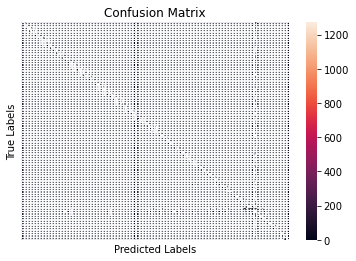

<Figure size 7200x14400 with 0 Axes>

In [29]:
cf_matrix(y_test, y_pred_xgb)

In [30]:
test_data = pd.read_csv('Website_Fingerprinting_CDMC2023_test.csv')
test_data.head()

,packet_size_with_direction_0,packet_size_with_direction_1,packet_size_with_direction_2,packet_size_with_direction_3,packet_size_with_direction_4,packet_size_with_direction_5,packet_size_with_direction_6,packet_size_with_direction_7,packet_size_with_direction_8,packet_size_with_direction_9,...,inter_arrival_time_4989,inter_arrival_time_4990,inter_arrival_time_4991,inter_arrival_time_4992,inter_arrival_time_4993,inter_arrival_time_4994,inter_arrival_time_4995,inter_arrival_time_4996,inter_arrival_time_4997,inter_arrival_time_4998
0,-1258.0,1208.0,1208.0,1208.0,759.0,-61.0,-93.0,-89.0,-352.0,539.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1258.0,1208.0,1208.0,1208.0,786.0,-61.0,-93.0,-86.0,-363.0,544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1258.0,1208.0,1208.0,1208.0,751.0,-61.0,-93.0,-91.0,-353.0,587.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1258.0,1258.0,1258.0,1258.0,-49.0,-49.0,534.0,-49.0,-91.0,-77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1258.0,1260.0,49.0,1260.0,-1258.0,1260.0,1260.0,175.0,-49.0,-49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
pred=xgb_clf.predict(test_data)
pred

array([ 3, 71, 77, ..., 77, 81, 77], dtype=int64)

In [33]:
pd.DataFrame(pred).to_csv('predictions_task2_3.csv', index=False, header=False)